1. Read the file “Brexit.docx” and write a function in Python named “GetNGrams” which takes a string and a number ‘n’ as input
and returns n-grams from the string.

  Example:

  String: “John met with an accident”

  Output:

  When n=2 => [(John, met), (met, with), (with, an), (an, accident)]

  When n=3 => [(John, met, with), (met, with, an), (with, an, accident)]

  When n=4 => [(John, met, w
  ith, an), (met, with, an, accident)]  

In [1]:
!pip install python-docx
import docx

doc = docx.Document('Brexit.docx')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 kB 4.0 MB/s eta 0:00:00


In [2]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def GetNGrams(string, n):

  tok = word_tokenize(string)
  ngrams_list = list(ngrams(tok, n))

  return ngrams_list

print(GetNGrams(input(), int(input())))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


quick brown fox jumps over the lazy dog
4
[('quick', 'brown', 'fox', 'jumps'), ('brown', 'fox', 'jumps', 'over'), ('fox', 'jumps', 'over', 'the'), ('jumps', 'over', 'the', 'lazy'), ('over', 'the', 'lazy', 'dog')]


2. Read the file “Brexit.docx” and write python functions which take a string as an input and returns:

  •Number of Nouns (all forms of noun). Take function name as “NounsCount”

  •Number of Pronouns (all forms). Take function name as “PronounsCount”

  •Number of Adjectives (all forms).Take function name as “AdjectivesCount”

  •Number of Verbs (all forms).Take function name as “VerbsCount”

  •Number of Adverbs (all forms).Take function name as “AdverbsCount”


  Plot a pie chart showing the distribution of nouns, pronouns,
  verbs, adverbs and adjectives.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Brexit is the impending withdrawal of the United Kingdom (UK) from the European Union (EU). In a referendum on 23 June 2016, a majority of British voters supported leaving the EU. On 29 March 2017, the UK government invoked Article 50 of the Treaty on European Union. The European Union (Withdrawal) Act 2018 declares "exit day" to be 29 March 2019 at 11 p.m. (Central European Time).
[28  0  7  4  0]


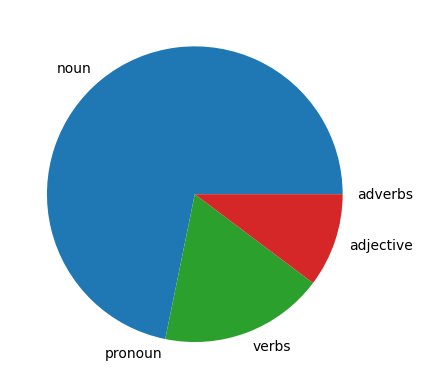

In [4]:
from nltk.tag import pos_tag

def NounsCount(string):
  tok = word_tokenize(string)
  tok = pos_tag(tok)
  noun_words = [word for word in tok if word[1] in ('NN', 'NNS', 'NNP' ,'NNPS') ]
  return len(noun_words)

def PronounsCount(string):
  tok = word_tokenize(string)
  tok = pos_tag(tok)
  pronoun_words = [word for word in tok if word[1] in ('PRP', 'PRP$', 'WP')]
  return len(pronoun_words)

def AdjectivesCount(string):
  tok = word_tokenize(string)
  tok = pos_tag(tok)
  adjective_words = [word for word in tok if word[1] == 'JJ']
  return len(adjective_words)

def VerbsCount(string):
  tok = word_tokenize(string)
  tok = pos_tag(tok)
  verbs_words = [word for word in tok if word[1] in ('VBZ', 'VBP', 'VBN', 'VBG', 'VBD', 'VB')]
  return len(verbs_words)

def AdverbsCount(string):
  tok = word_tokenize(string)
  tok = pos_tag(tok)
  adverbs_words = [word for word in tok if word[1] in ('WRB', 'RBS', 'RB', 'RBR')]
  return len(adverbs_words)

string = doc.paragraphs[0].text
noun = NounsCount(string)
pronoun = PronounsCount(string)
verbs = VerbsCount(string)
adjective = AdjectivesCount(string)
adverb = AdverbsCount(string)

print(string)
y = np.array([noun, pronoun, verbs, adjective, adverb])
print(y)
plt.pie(y, labels = ['noun', 'pronoun', 'verbs', 'adjective', 'adverbs'])
plt.show()

3. Read the file “Brexit.docx” and write python functions which take a string as an input and returns:

  •Number of geo-Political entities present in the file.
  Take function name as “GeoPoliticalCount”

  •Number of Persons present in the file. Take function name as “
  Persons Count”

  •Numbers of Organizations mentioned in the file.
  Take function name as “OrganizationsCount”

In [5]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [6]:
from nltk import ne_chunk

def GeoPoliticalCount(string):
  tok = word_tokenize(string)
  ne_tags = pos_tag(tok)
  ne_ner = list(ne_chunk(ne_tags))
  nn = [str(words) for words in ne_ner if 'GPE' in str(words)]
  return nn

def PersonsCount(string):
  tok = word_tokenize(string)
  ne_tags = pos_tag(tok)
  ne_ner = list(ne_chunk(ne_tags))
  nn = [str(words) for words in ne_ner if 'PERSON' in str(words)]
  return nn

def OrganizationsCount(string):
  tok = word_tokenize(string)
  ne_tags = pos_tag(tok)
  ne_ner = list(ne_chunk(ne_tags))
  nn = [str(words) for words in ne_ner if 'ORGANIZATION' in str(words)]
  return nn

string = doc.paragraphs[1].text
print(string)
geo_pol = GeoPoliticalCount(string)
persons = PersonsCount(string)
orgs = OrganizationsCount(string)

print(f"Total {len(geo_pol)} Geopolitical Entities detected as following\n")
print(geo_pol)
print(f"\nTotal {len(persons)} persons detected as following\n")
print(persons)
print(f"\nTotal {len(orgs)} organizations detected as following\n")
print(orgs)

Prime Minister Theresa May announced the government's intention not to seek permanent membership of the European single market or the EU customs union after leaving the EU and promised to repeal the European Communities Act of 1972 and incorporate existing European Union law into UK domestic law. A new government department, the Department for Exiting the European Union, was created in July 2016.
Total 4 Geopolitical Entities detected as following

['(GPE European/JJ)', '(GPE EU/NNP)', '(GPE EU/NNP)', '(GPE European/NNP Union/NNP)']

Total 1 persons detected as following

['(PERSON Theresa/NNP May/NNP)']

Total 4 organizations detected as following

['(ORGANIZATION European/NNP)', '(ORGANIZATION UK/NNP)', '(ORGANIZATION Department/NNP)', '(ORGANIZATION European/NNP Union/NNP)']


4. Answer the following questions:

  •Most frequent bi-gram from the data

  •Most frequent Noun

  •Most frequent GeoPolitical Entity

  •Most frequent person

In [7]:
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def GetNGrams(string, n):

  tok = word_tokenize(string)
  ngrams_list = list(ngrams(tok, n))

  return ngrams_list

lst = GetNGrams(string, 2)
fdist = FreqDist()
for i in lst:
  fdist[i] += 1
fdist.most_common(1)

[(('the', 'European'), 3)]

# Alternate solution

1. Read the file “Brexit.docx” and write a function in Python named “GetNGrams” which takes a string and a number ‘n’ as input and returns n-grams from the string.

In [10]:
#Reading file and content from user

document = docx.Document('Brexit.docx')
content=[]
for each in document.paragraphs:
    content.append(each.text)
content=" ".join(content)

#NGram Function
import nltk
def GetNGrams(string,n):
    tokens=nltk.tokenize.word_tokenize(string)
    return list(nltk.ngrams(tokens,n))

2. Read the file “Brexit.docx” and write python functions which take a string as an input and returns:


•	Number of Nouns (all forms of noun). Take function name as “NounsCount”

•	Number of Pronouns (all forms). Take function name as “PronounsCount”

•	Number of Adjectives (all forms). Take function name as “AdjectivesCount”

•	Number of Verbs (all forms). Take function name as “VerbsCount”

•	Number of Adverbs (all forms). Take function name as “AdverbsCount”

In [14]:
def GetPOSTags(string):
    tokens=nltk.word_tokenize(string)
    pos_tags=nltk.pos_tag(tokens)
    return pos_tags

#Number of Nouns
def NounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Pronouns
def PronounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['PRP','PRP$']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Verbs
def VerbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adjectives
def AdjectivesCount(string):
    POSTags=GetPOSTags(string)
    allForms=['JJ','JJR','JJS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adverbs
def AdverbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['RB','RBR']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

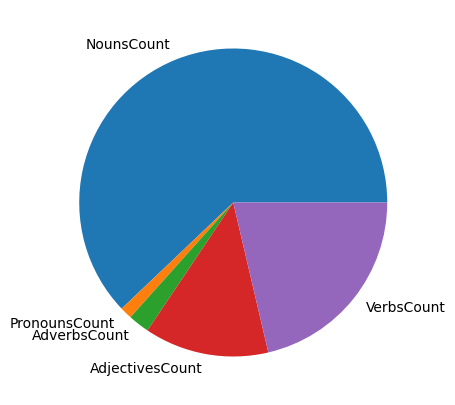

In [15]:
nouns=NounsCount(content)
pronouns=PronounsCount(content)
adjectives=AdjectivesCount(content)
adverbs=AdverbsCount(content)
verbs=VerbsCount(content)
allTags=[nouns,pronouns,adverbs,adjectives,verbs]
labels=['NounsCount','PronounsCount','AdverbsCount','AdjectivesCount','VerbsCount']

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(allTags,labels=labels)
plt.show()

3. Read the file “Brexit.docx” and write python functions which take a string as an input and returns:

  •	Number of geo-Political entities present in the file. Take function name as “GeoPoliticalCount”

  •	Number of Persons present in the file. Take function name as “PersonsCount”

  •	Numbers of Organizations mentioned in the file. Take function name as “OrganizationsCount”

In [16]:
# Run nltk.download('maxent_ne_chunker') and nltk.download('words') to use 'NE Chunk'
import nltk
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

#Number of GeoPolitical entities
def GeoPoliticalCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="GPE":
            count+=1
    return count

#Number of Persons
def PersonsCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="PERSON":
            count+=1
    return count

#Number of Organizations
def OrganizationCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="ORGANIZATION":
            count+=1
    return count


4 Answer the following questions:

•	Most frequent bi-gram from the data

•	Most frequent Noun

•	Most frequent GeoPolitical Entity

•	Most frequent person


In [17]:
#Most frequent bi-gram from the data
from collections import Counter
bigrams=GetNGrams(content,2)
c=Counter(bigrams)
c.most_common(1)

[((',', 'the'), 7)]

In [18]:
#Most frequent Noun Entity
from collections import Counter
import nltk

tokens=nltk.word_tokenize(content)
pos_tags=nltk.pos_tag(tokens)
allFormsOfNoun=['NN','NNP','NNS','NNPS']
allNouns=[]
for word,tag in pos_tags:
    if tag in allFormsOfNoun:
        allNouns.append((word))
c=Counter(allNouns)
c.most_common(1)

[('UK', 13)]

In [19]:
#Most frequent GeoPolitical Entity
from collections import Counter
import nltk

#use the function created above
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

#Get it for content of the file
NER=GetNERTags(content)
GlobalPoliticalEntities=[]
for each in NER:
    if hasattr(each, 'label') and each.label()=="GPE":
        GlobalPoliticalEntities.append(each[0][0])

c=Counter(GlobalPoliticalEntities)
c.most_common(1)

[('EU', 8)]

In [20]:
#Most frequent Person
from collections import Counter
import nltk

#use the function created above
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

#Get it for content of the file
NER=GetNERTags(content)
PERSON=[]
for each in NER:
    if hasattr(each, 'label') and each.label()=="PERSON":
        PERSON.append(each[0][0])

c=Counter(PERSON)
c.most_common(1)

[('Theresa', 2)]